# Generate random numbers with a specific distribution: Von Neumann's algorithm.

Given that the energy of a system can be written as the sum of a kinetic and a potential contribution $E(\textbf{p},\textbf{q}) = K(\textbf{q})+U(\textbf{p})$ where $\textbf{p}$ and $\textbf{q}$ are generalized momenta and coordinates the probability distribution of a paticle with E is the product of a kinetic part and a potential one. In a monoatomic system of particles with mass m and in a temprature T, velocities (the kinetic part) follow a Maxwell-Boltzmann distribution which is similar to a normal distribution in three dimensions:
\begin{equation}
f(v:m,T)=\bigg(\frac{m}{2\pi T}\bigg)^{3/2}e^{-m(v^2_x+v^2_y+v^2_z)/2T} 
\end{equation}

Von Neumann's algorithm transforms and *uniformly distributed* random variables *v'* into values *v* that follow any probability distribution, is often called acceptance and rejection algorithm:

1. Take uniform random v' between some limits of the distribution $[x_{min},x_{max}]$.
2. Take some other random value that follows $u \in [0,max\{f\}]$.
3. If u < f(v'), save the value, so v=v'.

The algorithm works because the probability of admittance is proportional to f(v). For the implementation, first we note that f can be further broken down into three parts.

In [6]:
from random import random
import numpy as np
''' 
This program calculates random numbers that follows Maxwell-Boltzmann distribution. 
Using Von Neumann's algorithm: 

- first generate uniformly distributed random number v between [0,1]
- generate random number u in [0,fmax],
- save v such that f(v)>u
'''

#Maxwell Boltzmann parameters.
atom_number = 1e4
max_velocity = 3e4
min_velocity = -3e4
m,T = 1e-10,300

velocity = [[],[],[]]

def maxwell(x):
    f = np.power(((m)/(2*np.pi*T)),(3/2))*np.power(np.e,-m*(x*x/2*T))
    return f

maxf = np.power(((m)/(2*np.pi*T)),(3/2))

#any distribution g(x) can be followed, changing f and maxf.

counter,n = 0,0
for i in [0,1,2]:
    n=0
    
    while n <= atom_number:
        v = min_velocity+random()*(max_velocity-min_velocity)
        u = random()*maxf
        
        if u < maxwell(v):
            velocity[i].append(v)
            n = n+1
            
        counter = counter+1
        

print(f"Generated numbers tried {counter}")


Generated numbers tried 123466


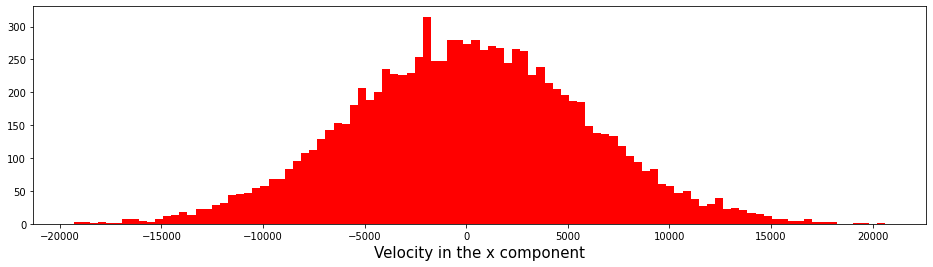

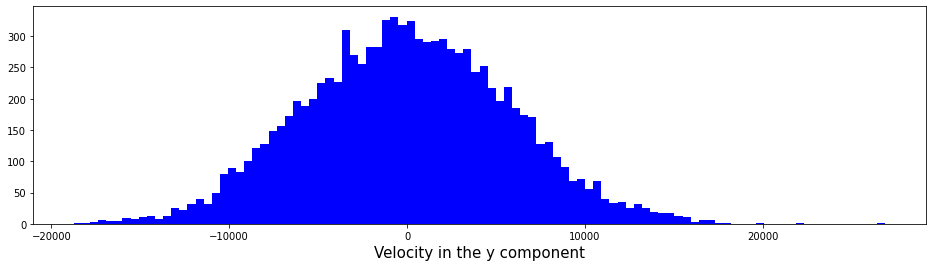

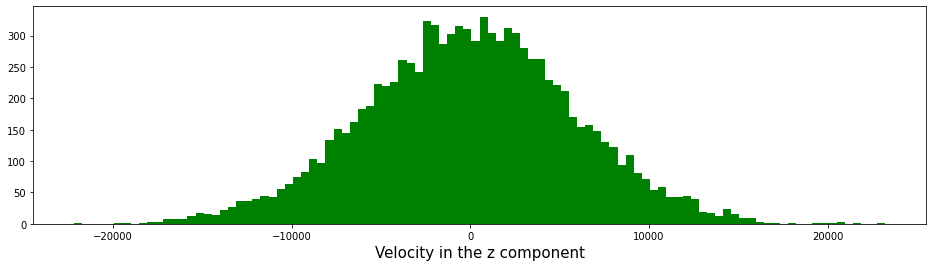

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

for i,j,k in zip([0,1,2],['x','y','z'],['r','b','g']):
    
    fig=plt.figure(figsize=(16,4))
    plt.hist(velocity[i],bins=100,color=k)
    plt.xlabel(f"Velocity in the {j} component",fontsize=15)

## References
- G. Cowan, *Statistical Data Analysis*,  Oxford University Press, 1998.
- L.D. Landau & E. M. Lifshitz, *Statistical Mechanics*, Pergamon Press, 1970.  